Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week 10 - Assignments
## Dimensionality reduction and feature selection

There are two assignements based on examples shown in the classroom. Each completed assignment gives one point. There are also two ungraded optional assignments: one applies NMF to faces dataset and the second one applies clustering to the BRCA dataset analyzed in the classroom.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/syedather/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/syedather/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


## 1. Task 1 (1 point)
Apply feature selection to the [Olivetti faces dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces), identifying the most important 25% of features based on the chi2 criteria (you can use SelectPercentile). This dataset consists of 10 pictures each of 40 individuals. Each picture is 64x64 pixels, thus the dimensionality of the problem is 4096 features if we consider that each pixel is a feature . You can visualize these top selected features on a 64x64 pixel heatmap for visual aid.

What the test expects:
 * Use variables __X__ and __y__ for data and the corresponding labels.
 * The new dataset with 25% of features should be named __X_new__ 
    

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.feature_selection import SelectPercentile, chi2

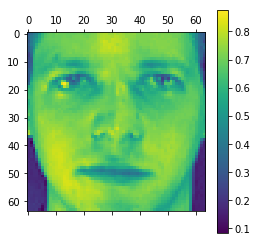

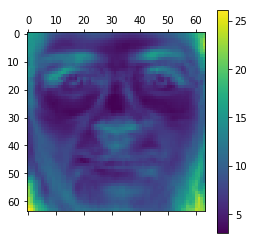

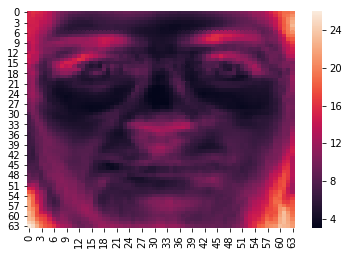

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.datasets
import sklearn.feature_selection

from sklearn.datasets import fetch_olivetti_faces
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

faces = fetch_olivetti_faces()

plt.matshow(faces.data[0].reshape((64,64)))
plt.colorbar()
plt.show()

X = faces.data
y = faces.target

p75 = SelectPercentile(score_func=chi2, percentile=25)
X_new = p75.fit_transform(faces.data, faces.target)
reshaped = np.reshape(p75.scores_, (64, 64))

plt.matshow(reshaped)
plt.colorbar()
plt.show()

sns.heatmap(reshaped, cbar=True)
plt.show()

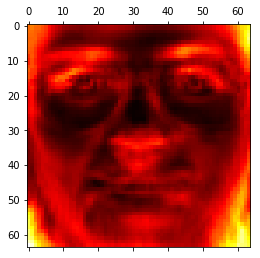

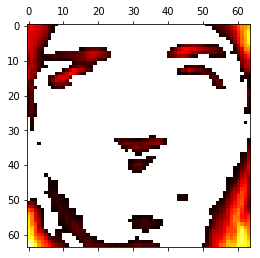

In [4]:
assert X.shape == (400, 4096)
assert y.shape == (400,)
assert X_new.shape == (400, 1024)

assert min(chi2(X_new, y)[0]) > min(chi2(X, y)[0])

####################################### 
# chi2 score of each feature (pixel)
importances = np.array(chi2(X, y)[0])
plt.matshow(importances.reshape(64,64), cmap=plt.cm.hot)

# only top 25% of the most important features
min_chi2 = min(chi2(X_new, y)[0])
importances = np.where(importances < min_chi2, np.inf, importances)
plt.matshow(importances.reshape(64,64), cmap=plt.cm.hot)

### Optional exercise 1 (not graded) - NMF applied to faces

Have a look at the seminal paper that introduced NMF: http://www.columbia.edu/~jwp2128/Teaching/E4903/papers/nmf_nature.pdf

I hope you will become inspired to reproduce the original experiment by applying NMF to Olivetti faces dataset. Decompose faces into a desired number of components (try 8, then 16, for instance). Show the components as images. Due to non-negative nature of the procedure, the individual components can be interpreted as facial features.


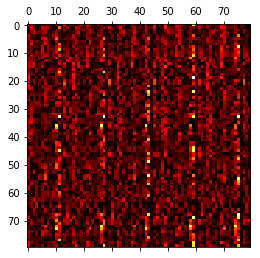

In [34]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

import pandas as pd

nmf = NMF(n_components=16, random_state=0).fit_transform(X)

plt.matshow(nmf.reshape(80,80), cmap=plt.cm.hot)

## Task 2 (1 point)

Apply tSNE to the digits dataset (transform to 2D). Digits dataset has about 180 samples per class, so we should set perplexity=150 in tSNE accordingly. Afterwards, perform K-means clustering into 10 clusters in 2D feature space obtained after tSNE transformation. Calculate sklearn.metrics.adjusted_rand_score between the labels obtained in clustering and the original digit labels. http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

What the test expects:
 * Use variables __X__ and __y__ for data and the corresponding labels.
 * tSNE-transformed 2D dataset should be named __X_new__
 * The variable holding Adjusted Rand Score should be named __score__
 * The variable holding cluster labels assigned by KMeans should be named __y_new__

In [6]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = datasets.load_digits()

X = digits.data
y = digits.target
    
X_new = TSNE(n_components=2, perplexity=150, random_state=0).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_new)
y_new = kmeans.labels_
score = adjusted_rand_score(y, y_new)

0.770337071538


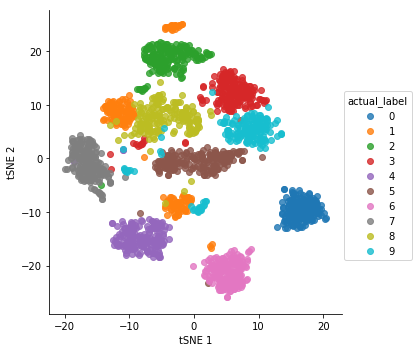

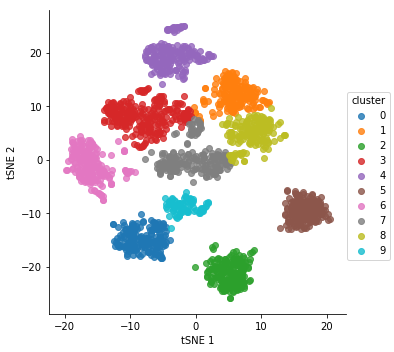

In [8]:
assert X.shape == (1797, 64)
assert X_new.shape == (1797, 2)
assert y.shape == (1797, )
assert y_new.shape == (1797, )
print(score)
assert score > 0.7

###################################
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'tSNE 1': X_new[:, 0], 'tSNE 2': X_new[:, 1], 'actual_label': y, 'cluster': y_new})
sns.lmplot(data=df, x='tSNE 1', y='tSNE 2', hue='actual_label', fit_reg=False)
sns.lmplot(data=df, x='tSNE 1', y='tSNE 2', hue='cluster', fit_reg=False)

## 3. Optional exercise 2 (not graded) - Comparing clustering before and after NMF

Use BRCA gene expression data (measured with antibodies on a protein level)  provided in this class. Apply K-means clustering to the original expression data first; then apply it to the result of NMF decomposition with 10 components (H matrix). For simplicity, also use k=10 as the number of clusters in K-means. Calculate adjusted_rand_score as a measure of consensus between the two clustering results.



In [9]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

import pandas as pd

expression_fname = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz'

E = pd.read_csv(expression_fname, delimiter='\t')

E = E[['icgc_donor_id', 'gene_name', 'antibody_id', 'normalized_expression_level']]

E_mean = E.groupby(['icgc_donor_id','gene_name']).mean()

X = MinMaxScaler().fit_transform(E_mean)

nmf = NMF(n_components=10, random_state=0).fit_transform(X)

Ekmeans = KMeans(n_clusters=10, random_state=0).fit(X)

nmfkmeans = KMeans(n_clusters=10, random_state=0).fit(nmf)

print("Adj. Rand score", adjusted_rand_score(Ekmeans.labels_, nmfkmeans.labels_))

Adj. Rand score 0.00410295685303
